In [2]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt

from multirtd.simple_planner import Simple_Planner
import multirtd.params as params

In [26]:
# Initialize planner
p_0 = np.array([[-5], [0]]) # This sets where the robot starts
LPM_file = os.path.join(os.getcwd(),'..', 'models', 'quadrotor_linear_planning_model.mat')
planner = Simple_Planner(LPM_file, p_0)

In [27]:
# Lets add another instance
p_02 = np.array([[-5], [-2]]) # This sets where the robot starts
LPM_file = os.path.join(os.getcwd(),'..', 'models', 'quadrotor_linear_planning_model.mat')
planner2 = Simple_Planner(LPM_file, p_02)

In [37]:
# Set planner goal and obstacles
planner.p_goal = np.array([[5], [0]]) # This sets the goal position
# (center, radius) tuples
static = [(np.array([3, 1]), 1),
          (np.array([0, -1.5]), 1),
          (np.array([-3, 1]), 1),
          (np.array([-3, -3]), 1)]
planner.obstacles = static

In [38]:
# Other instance
planner2.p_goal = np.array([[5], [-.5]]) # This sets the goal position
# (center, radius) tuples
planner2.obstacles = static

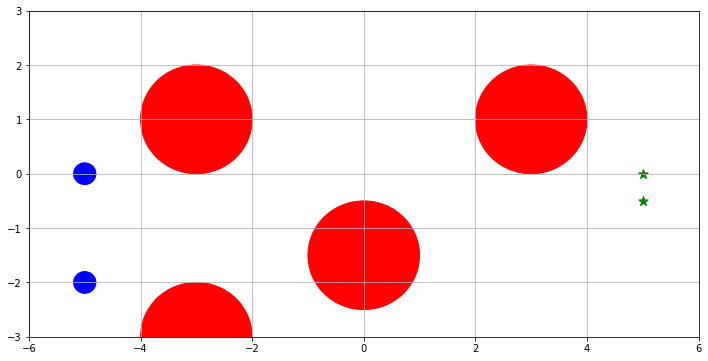

In [39]:
# Visualize setup
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlim((-6, 6))
ax.set_ylim((-3, 3))
ax.grid()

#ax.scatter(p_0[0], p_0[1], s=50, marker='^', color='b')
ax.add_patch(plt.Circle(tuple(p_0), params.R_BOT, color='b'))
ax.scatter(planner.p_goal[0], planner.p_goal[1], s=100, marker='*', color='g')

# Other instance
ax.add_patch(plt.Circle(tuple(p_02), params.R_BOT, color='b'))
ax.scatter(planner2.p_goal[0], planner2.p_goal[1], s=100, marker='*', color='g')

plt_obs = []
for obs in planner.obstacles:
    ax.add_patch(plt.Circle(tuple(obs[0]), obs[1], color='r'))

plt.show()

In [40]:
# "Controller" loop frequency 
# Determined by trajectory discretization
# Currently the controller just pops off setpoints from the planner trajectories to save for plotting
controller_hz = 10  # 0.1 s

# Planner loop frequency
# Determines time between replans
planner_hz = 2  # 0.5 s

t_sim = 0  # counter for simulation time
trajectory = None
traj_idx = 0
done = False

# Initialize state
p = p_0
v = np.zeros((2,1))
a = np.zeros((2,1))
# State history
P = []
planning_times = []

while not done:

    # Planner
    if t_sim % int(controller_hz/planner_hz) == 0:
        # Replan
        print("Replanning: t_sim = ", t_sim)
        start_t = time.time()
        trajectory = planner.replan((p,v,a))
        planning_times.append(time.time() - start_t)
        traj_idx = 0

    # Controller
    # Pop off next setpoint
    p = trajectory[0][:,traj_idx][:,None]
    v = trajectory[1][:,traj_idx][:,None]
    a = trajectory[2][:,traj_idx][:,None]
    P.append(p)
    traj_idx += 1

    if np.linalg.norm(p - planner.p_goal) < params.R_GOAL_REACHED:
        print("Goal reached")
        done = True

    t_sim += 1

P = np.hstack(P)
print("Average planning time: ", np.mean(planning_times), " seconds")

Replanning: t_sim =  0
Replanning: t_sim =  5
Replanning: t_sim =  10
Replanning: t_sim =  15
Replanning: t_sim =  20
Replanning: t_sim =  25
Replanning: t_sim =  30
Replanning: t_sim =  35
Replanning: t_sim =  40
Replanning: t_sim =  45
Replanning: t_sim =  50
Replanning: t_sim =  55
Replanning: t_sim =  60
Replanning: t_sim =  65
Replanning: t_sim =  70
Replanning: t_sim =  75
Replanning: t_sim =  80
Replanning: t_sim =  85
Replanning: t_sim =  90
Replanning: t_sim =  95
Replanning: t_sim =  100
Goal reached
Average planning time:  0.019904477255684987  seconds


In [41]:
# Other instance

# "Controller" loop frequency 
# Determined by trajectory discretization
# Currently the controller just pops off setpoints from the planner trajectories to save for plotting
controller_hz = 10  # 0.1 s

# Planner loop frequency
# Determines time between replans
planner_hz = 2  # 0.5 s

t_sim = 0  # counter for simulation time
trajectory = None
traj_idx = 0
done = False

# Initialize state
p = p_02
v = np.zeros((2,1))
a = np.zeros((2,1))
# State history
P2 = []
planning_times = []

while not done:

    # Planner
    if t_sim % int(controller_hz/planner_hz) == 0:
        # Replan
        print("Replanning: t_sim = ", t_sim)
        start_t = time.time()
        trajectory = planner2.replan((p,v,a))
        planning_times.append(time.time() - start_t)
        traj_idx = 0

    # Controller
    # Pop off next setpoint
    p = trajectory[0][:,traj_idx][:,None]
    v = trajectory[1][:,traj_idx][:,None]
    a = trajectory[2][:,traj_idx][:,None]
    P2.append(p)
    traj_idx += 1

    if np.linalg.norm(p - planner2.p_goal) < params.R_GOAL_REACHED:
        print("Goal reached")
        done = True

    t_sim += 1

P2 = np.hstack(P2)
print("Average planning time: ", np.mean(planning_times), " seconds")

Replanning: t_sim =  0
Replanning: t_sim =  5
Replanning: t_sim =  10
Replanning: t_sim =  15
Replanning: t_sim =  20
Replanning: t_sim =  25
Replanning: t_sim =  30
Replanning: t_sim =  35
Replanning: t_sim =  40
Replanning: t_sim =  45
Replanning: t_sim =  50
Replanning: t_sim =  55
Replanning: t_sim =  60
Replanning: t_sim =  65
Replanning: t_sim =  70
Replanning: t_sim =  75
Replanning: t_sim =  80
Replanning: t_sim =  85
Replanning: t_sim =  90
Replanning: t_sim =  95
Goal reached
Average planning time:  0.008951306343078613  seconds


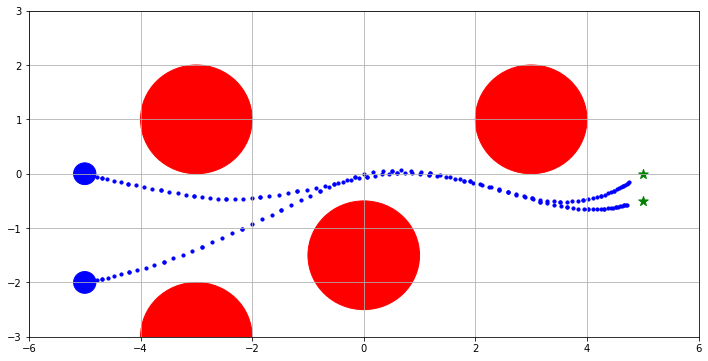

In [42]:
# Visualize setup
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlim((-6, 6))
ax.set_ylim((-3, 3))
ax.grid()

ax.add_patch(plt.Circle(tuple(p_0), params.R_BOT, color='b'))
ax.scatter(planner.p_goal[0], planner.p_goal[1], s=100, marker='*', color='g')

# Other instance
ax.add_patch(plt.Circle(tuple(p_02), params.R_BOT, color='b'))
ax.scatter(planner2.p_goal[0], planner2.p_goal[1], s=100, marker='*', color='g')

plt_obs = []
for obs in planner.obstacles:
    ax.add_patch(plt.Circle(tuple(obs[0]), obs[1], color='r'))

# Plot trajectory
ax.scatter(P[0,:], P[1,:], s=10, marker='o', color='b')

# Other instance
ax.scatter(P2[0,:], P2[1,:], s=10, marker='o', color='b')

plt.show()

In [50]:
# Fixing this so they don't collide.

# "Controller" loop frequency 
# Determined by trajectory discretization
# Currently the controller just pops off setpoints from the planner trajectories to save for plotting
controller_hz = 10  # 0.1 s

# Planner loop frequency
# Determines time between replans
planner_hz = 2  # 0.5 s

t_sim = 0  # counter for simulation time
trajectory = None
traj_idx = 0
done = False
trajectory2 = None

# Initialize state
p = p_0
v = np.zeros((2,1))
a = np.zeros((2,1))
p2 = p_02
v2 = np.zeros((2,1))
a2 = np.zeros((2,1))
# State history
P = []
planning_times = []
P2 = []

while not done:

    # Planner
    if t_sim % int(controller_hz/planner_hz) == 0:
        # Replan
        print("Replanning: t_sim = ", t_sim)
        start_t = time.time()
        trajectory = planner.replan((p,v,a))
        if trajectory!=None:
            planner2.obstacles = static.copy() + [(trajectory[0][:,0],params.R_BOT),(trajectory[0][:,1],params.R_BOT),(trajectory[0][:,2],params.R_BOT)]
        trajectory2 = planner2.replan((p2,v2,a2))
        if trajectory2!=None:
            planner.obstacles = static.copy() + [(trajectory2[0][:,0],params.R_BOT),(trajectory2[0][:,1],params.R_BOT),(trajectory2[0][:,2],params.R_BOT)]
        planning_times.append(time.time() - start_t)
        traj_idx = 0

    # Controller
    # Pop off next setpoint
    if trajectory!=None:
        p = trajectory[0][:,traj_idx][:,None]
        v = trajectory[1][:,traj_idx][:,None]
        a = trajectory[2][:,traj_idx][:,None]
    P.append(p)
    # Other instance
    if trajectory2!=None:
        p2 = trajectory2[0][:,traj_idx][:,None]
        v2 = trajectory2[1][:,traj_idx][:,None]
        a2 = trajectory2[2][:,traj_idx][:,None]
    P2.append(p2)
    traj_idx += 1

    if np.linalg.norm(p - planner.p_goal) < params.R_GOAL_REACHED:
        print("Goal reached")
        done = True

    t_sim += 1

P = np.hstack(P)
P2 = np.hstack(P2)
print("Average planning time: ", np.mean(planning_times), " seconds")

Replanning: t_sim =  0
Replanning: t_sim =  5
Replanning: t_sim =  10
Replanning: t_sim =  15
Replanning: t_sim =  20
Replanning: t_sim =  25
Replanning: t_sim =  30
Ran out of time for planning, idx =  3914
Replanning: t_sim =  35
Ran out of time for planning, idx =  3969
Replanning: t_sim =  40
Ran out of time for planning, idx =  4160
Replanning: t_sim =  45
Ran out of time for planning, idx =  3998
Replanning: t_sim =  50
Replanning: t_sim =  55
Replanning: t_sim =  60
Replanning: t_sim =  65
Replanning: t_sim =  70
Replanning: t_sim =  75
Replanning: t_sim =  80
Replanning: t_sim =  85
Replanning: t_sim =  90
Replanning: t_sim =  95
Replanning: t_sim =  100
Goal reached
Average planning time:  0.1330478759039016  seconds


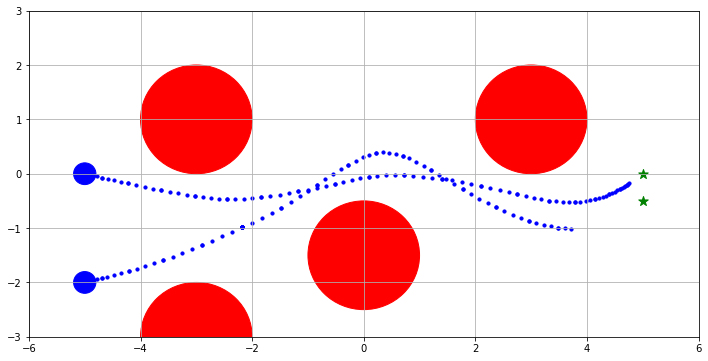

In [51]:
# Visualize setup
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlim((-6, 6))
ax.set_ylim((-3, 3))
ax.grid()

ax.add_patch(plt.Circle(tuple(p_0), params.R_BOT, color='b'))
ax.scatter(planner.p_goal[0], planner.p_goal[1], s=100, marker='*', color='g')

# Other instance
ax.add_patch(plt.Circle(tuple(p_02), params.R_BOT, color='b'))
ax.scatter(planner2.p_goal[0], planner2.p_goal[1], s=100, marker='*', color='g')

plt_obs = []
for obs in static:
    ax.add_patch(plt.Circle(tuple(obs[0]), obs[1], color='r'))

# Plot trajectory
ax.scatter(P[0,:], P[1,:], s=10, marker='o', color='b')

# Other instance
ax.scatter(P2[0,:], P2[1,:], s=10, marker='o', color='b')

plt.show()

In [19]:
trajectory

(array([[-2.47507015, -2.33083139, -2.182992  , -2.03127187, -1.87547362,
         -1.71548262, -1.55126698, -1.38287753, -1.21044784, -1.03419424,
         -0.85441576, -0.67149419, -0.48589406, -0.29816263, -0.10892989,
          0.08109143,  0.2704318 ,  0.45509571,  0.63102646,  0.79484349,
          0.94384233,  1.07599464,  1.18994819,  1.28502686,  1.36123066,
          1.41923569,  1.46039419,  1.4867345 ,  1.50096109,  1.50645452,
          1.5072715 ],
        [-0.47630972, -0.47895573, -0.47578203, -0.46685433, -0.45229225,
         -0.43226929, -0.40701284, -0.37680419, -0.34197852, -0.3029249 ,
         -0.26008629, -0.21395954, -0.16509539, -0.11409848, -0.06162733,
         -0.00839436,  0.04473931,  0.09656064,  0.14593123,  0.19190241,
          0.23371523,  0.27080049,  0.30277872,  0.32946018,  0.35084488,
          0.36712255,  0.37867266,  0.38606442,  0.39005675,  0.39159835,
          0.39182761]]),
 array([[ 1.42552495,  1.45985495,  1.49739972,  1.5373319 ,  1.

In [36]:
type(trajectory)

NoneType

In [32]:
static.copy() + [(trajectory[0][:,0],params.R_BOT)]

[(array([3, 1]), 1),
 (array([ 0. , -1.5]), 1),
 (array([-3,  1]), 1),
 (array([-3, -3]), 1),
 (array([ 4.68448089, -1.84441833]), 0.2)]

In [33]:
static

[(array([3, 1]), 1),
 (array([ 0. , -1.5]), 1),
 (array([-3,  1]), 1),
 (array([-3, -3]), 1)]